In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
weather_data = pd.read_pickle('df_weather.pickle.gz')
weather_data.index=pd.to_datetime(weather_data.index)
weather_data.dtypes

Avg Temp    float64
Min Temp    float64
Max Temp    float64
Precip      float64
dtype: object

In [28]:
data = pd.read_csv('merged_data.csv')

In [29]:
data['Date'] = pd.to_datetime(data['Date'])

In [26]:
data

,Date,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),...,Floor7_z4_S1(lux),Floor7_z5_AC1(kW),Floor7_z5_Light(kW),Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux),weekday,hour,date
0,2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,...,0.0,0.0,0.0,0.03,66.72,28.93,0.0,6,0,2018-07-01
1,2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,...,0.0,0.0,0.0,0.03,66.70,28.92,0.0,6,0,2018-07-01
2,2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,...,0.0,0.0,0.0,0.05,66.70,28.92,0.0,6,0,2018-07-01
3,2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,...,0.0,0.0,0.0,0.14,66.70,28.92,0.0,6,0,2018-07-01
4,2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,...,0.0,0.0,0.0,0.13,66.70,28.92,0.0,6,0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,...,0.0,0.0,0.0,0.03,52.86,29.43,0.0,1,23,2019-12-31
790556,2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,...,0.0,0.0,0.0,0.03,52.87,29.43,0.0,1,23,2019-12-31
790557,2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,...,0.0,0.0,0.0,0.03,52.84,29.42,0.0,1,23,2019-12-31
790558,2019-12-31 23:58:00,0.01,0.01,40.38,0.03,0.00,0.00,8.87,17.81,11.03,...,0.0,0.0,0.0,0.03,52.87,29.41,0.0,1,23,2019-12-31


In [30]:
data['weekday'] = data['Date'].dt.weekday
data['hour'] = data['Date'].dt.hour
data['date'] =pd.to_datetime(data['Date'].dt.date)

# Add weather features
data = data.merge(weather_data.reset_index(), left_on='date', right_on='index')

data = data.set_index('Date').drop(['date', 'index'],axis=1)

data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,Floor7_z5_Plug(kW),Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux),weekday,hour,Avg Temp,Min Temp,Max Temp,Precip
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0.03,66.72,28.93,0.0,6,0,29.50,25.00,34.50,17.0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,...,0.03,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,...,0.05,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,...,0.14,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,...,0.13,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,1.25,...,0.03,52.86,29.43,0.0,1,23,28.22,23.22,34.78,0.0
2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,1.25,...,0.03,52.87,29.43,0.0,1,23,28.22,23.22,34.78,0.0
2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,1.24,...,0.03,52.84,29.42,0.0,1,23,28.22,23.22,34.78,0.0


In [20]:
data.dtypes

Floor1_z1_Light(kW)    float64
Floor1_z1_Plug(kW)     float64
Floor1_z2_AC1(kW)      float64
Floor1_z2_AC2(kW)      float64
Floor1_z2_AC3(kW)      float64
                        ...   
hour                     int32
Avg Temp               float64
Min Temp               float64
Max Temp               float64
Precip                 float64
Length: 198, dtype: object

In [22]:
data.to_csv('data_w_weather.csv')

In [22]:
data

,Floor1_z1_Light(kW),Floor1_z1_Plug(kW),Floor1_z2_AC1(kW),Floor1_z2_AC2(kW),Floor1_z2_AC3(kW),Floor1_z2_AC4(kW),Floor1_z2_Light(kW),Floor1_z2_Plug(kW),Floor1_z3_Light(kW),Floor1_z3_Plug(kW),...,hour,Avg Temp_x,Min Temp_x,Max Temp_x,Precip_x,index,Avg Temp_y,Min Temp_y,Max Temp_y,Precip_y
0,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,...,0,29.50,25.00,34.50,17.0,2018-07-01,29.50,25.00,34.50,17.0
1,12.87,19.04,46.71,0.02,0.01,0.01,16.01,15.65,10.86,0.72,...,0,28.17,26.00,33.72,46.0,2018-07-02,28.17,26.00,33.72,46.0
2,0.01,11.43,45.91,0.02,0.01,0.01,19.30,15.20,10.95,0.73,...,0,28.94,25.78,32.50,0.0,2018-07-03,28.94,25.78,32.50,0.0
3,12.86,11.35,2.13,0.02,0.01,0.00,13.64,17.66,18.63,1.19,...,0,28.89,26.50,33.78,1.0,2018-07-04,28.89,26.50,33.78,1.0
4,12.86,29.17,43.42,0.03,0.01,0.00,13.63,15.45,18.60,0.81,...,0,29.56,26.00,33.61,0.0,2018-07-05,29.56,26.00,33.61,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,8.24,0.00,45.64,0.02,0.01,0.01,4.28,13.04,19.24,0.89,...,0,29.39,25.78,35.11,0.0,2019-12-27,29.39,25.78,35.11,0.0
545,8.38,0.01,46.65,0.02,0.00,0.01,4.32,15.34,10.67,1.32,...,0,27.78,24.50,31.50,0.0,2019-12-28,27.78,24.50,31.50,0.0
546,8.24,0.01,45.93,0.01,0.01,0.01,8.24,26.39,12.93,1.24,...,0,28.67,24.00,33.28,0.0,2019-12-29,28.67,24.00,33.28,0.0
547,8.19,0.01,45.57,0.02,0.01,0.00,4.28,16.18,12.91,0.80,...,0,28.00,23.39,32.72,0.0,2019-12-30,28.00,23.39,32.72,0.0


In [31]:
X = data.loc[:, ~data.columns.str.contains('kW')].copy()
X['total_demand'] = data.loc[:, data.columns.str.contains('kW')].sum(axis=1)
X.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [32]:
X

,Floor2_z1_S1(RH%),Floor2_z1_S1(degC),Floor2_z1_S1(lux),Floor2_z2_S1(RH%),Floor2_z2_S1(degC),Floor2_z2_S1(lux),Floor2_z3_S1(RH%),Floor2_z3_S1(degC),Floor2_z3_S1(lux),Floor2_z4_S1(RH%),...,Floor7_z5_S1(RH%),Floor7_z5_S1(degC),Floor7_z5_S1(lux),weekday,hour,Avg Temp,Min Temp,Max Temp,Precip,total_demand
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-01 00:00:00,58.93,28.36,0.0,64.89,28.85,0.0,68.22,29.30,0.0,60.18,...,66.72,28.93,0.0,6,0,29.50,25.00,34.50,17.0,176.310000
2018-07-01 00:01:00,58.91,28.36,0.0,64.89,28.85,0.0,68.21,29.30,0.0,60.18,...,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0,176.040000
2018-07-01 00:02:00,58.94,28.36,0.0,64.89,28.85,0.0,68.24,29.29,0.0,60.18,...,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0,174.540000
2018-07-01 00:03:00,58.94,28.36,0.0,64.89,28.85,0.0,68.28,29.29,0.0,60.18,...,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0,175.720000
2018-07-01 00:04:00,58.94,28.36,0.0,64.90,28.84,0.0,68.30,29.29,0.0,60.18,...,66.70,28.92,0.0,6,0,29.50,25.00,34.50,17.0,174.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,61.50,27.65,0.0,54.90,27.75,0.0,58.94,28.34,0.0,55.30,...,52.86,29.43,0.0,1,23,28.22,23.22,34.78,0.0,102.117671
2019-12-31 23:56:00,61.45,27.66,0.0,54.98,27.76,0.0,58.36,28.34,0.0,55.60,...,52.87,29.43,0.0,1,23,28.22,23.22,34.78,0.0,113.127671
2019-12-31 23:57:00,61.49,27.65,0.0,54.88,27.77,0.0,57.74,28.37,0.0,55.10,...,52.84,29.42,0.0,1,23,28.22,23.22,34.78,0.0,145.017671


In [35]:
rolling_avg = X['total_demand'].rolling(window=150, min_periods=1).mean() # 150 minutes
Q1 = np.percentile(rolling_avg, 25)
Q3 = np.percentile(rolling_avg, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in rolling_avg if x < lower_bound or x > upper_bound]
percentage_outliers = len(outliers) / len(rolling_avg) * 100

print(f"Процент выбросов: {round(percentage_outliers, 3)}%")

Процент выбросов: 1.046%


In [36]:
X['total_demand'] = rolling_avg

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1d23f76d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1d23f7af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1d23f7430>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1d2458070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1d2458310>],
 'means': []}

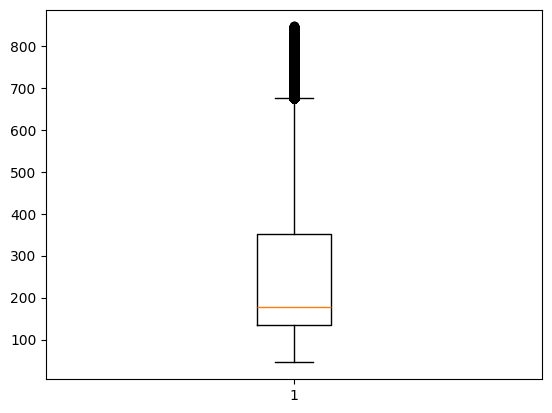

In [37]:
plt.boxplot(X['total_demand'])

In [38]:
X.to_csv('data_with_weather_wo_outliers.csv')